# generate smiles .csv for different df categories

In [2]:
import sys
sys.path.append('../')
import dft_descriptors.fragmentation as fg
import dft_descriptors.numbering_CO as nb

In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') 

In [4]:
df = pd.read_csv('../data_csv/Data_test09032021.csv', sep = ',')

In [5]:
co_unik_can = []
ax_unik_can = []
base_add_can = []
solvent_unik_can = []
ligand_unik_can = []

# AX

In [6]:
for smi in df["A-X effectif"]:
    smi_can = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
    if smi_can not in ax_unik_can:
        ax_unik_can.append(smi_can)

In [8]:
ax_unik_can

['[Li]c1ccccc1',
 '[Li]c1ccccc1C',
 '[Li]c1c(C)cc(C)cc1C',
 '[Li]c1ccc(C(C)(C)C)cc1',
 '[Li]c1ccc(OC)cc1',
 '[Li]c1ccc(O[Si](c2ccccc2)(c2ccccc2)C(C)(C)C)cc1',
 '[Li]c1ccccc1OCOC',
 '[Li]c1ccc(N(C)C)cc1',
 '[Li]c1cccc2ccccc12',
 '[Li]c1ccc(O[Si](C)(C)C)cc1',
 '[Li]c1cccc(O[Si](C)(C)C(C)(C)C)c1',
 '[Li]c1cccn1C',
 '[Li]c1cc2ccccc2n1C',
 '[Li]c1ccc2ccn(C)c2c1',
 '[Li]c1ccc2c3ccccc3n(CC)c2c1',
 '[Li]C=CCCCCCCCC',
 '[Li]C1=CCCCC1',
 '[Li]C1CC1',
 '[Li]C',
 '[Li][Zn]([Li])(C)(C)(C)c1ccccc1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccccc1C',
 '[Li][Zn]([Li])(C)(C)(C)c1cccc(C)c1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc(C)cc1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc(OC)cc1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc(C(=O)N(C(C)C)C(C)C)cc1',
 '[Li][Zn]([Li])(C)(C)(C)c1ccc2ccccc2c1',
 'Cc1ccc([Mg]Br)cc1',
 'Cc1ccc(Br)cc1',
 'Cc1ccc([Zn]Br)cc1',
 'Cc1ccc([Mn]Br)cc1',
 'Cc1ccc([Mg]Cl)cc1',
 'Cc1ccc([Mg]I)cc1',
 'Br[Mg]c1ccccc1',
 'CC(C)c1ccc([Mg]Br)cc1',
 'CC(C)(C)c1ccc([Mg]Br)cc1',
 'Cc1cccc([Mg]Br)c1',
 'Cc1ccccc1[Mg]Br',
 'COc1ccc([Mg

# Base-Additifs

In [35]:
def smiles_additifs(liste_additif) :
    base_additif = []
    for i in liste_additif :
        smiles = str(i).replace('[Sc+++]', '[Sc+3]').replace('[Ti++++]', '[Ti+4]').replace('[Al+++]', '[Al+3]').replace('[Fe+++]', '[Fe+3]').replace('[HO-]', '[O-]')
        try :
            base_additif.append(Chem.MolToSmiles(Chem.MolFromSmiles(smiles)))
            if Chem.MolFromSmiles(smiles) is None :
                print(smiles)
        except :
            base_additif.append('nan')
    return base_additif

base_add = smiles_additifs(df["Base/additif après correction effective"])

for smi in base_add:
    if str(smi) != 'nan':
        smi_can = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
        if smi_can not in base_add_can:
            base_add_can.append(smi_can)

In [36]:
len(base_add_can)

135

# Ligands

In [37]:
dict_ligand = {
    #Phosphines
          "PCy3" : "P(C1CCCCC1)(C2CCCCC2)C3CCCCC3",
          "PCy2(1,2-biPh)" : "c1ccccc1c2ccccc2P(C3CCCCC3)C4CCCCC4",
          "PCy2(1,2-biPhN)" : "c1cccc(N(C)C)c1c2ccccc2P(C3CCCCC3)C4CCCCC4",
          "PPhCy2" : "P(c1ccccc1)(C2CCCCC2)C3CCCCC3",
          "PhPCy2" : "P(c1ccccc1)(C2CCCCC2)C3CCCCC3",
          "CC(O)c1ccccc1P(c2ccccc2)c3ccccc3" : "CC(O)c1ccccc1P(c2ccccc2)c3ccccc3",
          "t-BuPCy2" : "P(C(C)(C)C)(C2CCCCC2)C3CCCCC3",
          "PCp3" : "C3=CC(P(C1C=CC=C1)C2C=CC=C2)C=C3",
          "PPh3" : "P(c1ccccc1)(c2ccccc2)c3ccccc3",
          "P(o-tolyl)3" : "Cc1ccccc1P(c2ccccc2C)c3ccccc3C",
          "P(nBu)3" : "P(CCCC)(CCCC)CCCC",
          "P(tBu)3" : "P(C(C)(C)C)(C(C)(C)C)C(C)(C)C",
          "P(OMe)3" : "P(OC)(OC)OC",
          "P(CH2Ph)3" : "P(Cc1ccccc1)(Cc2ccccc2)Cc3ccccc3",
          "P(p-OMePh)3" : "P(c1ccc(OC)cc1)(c2ccc(OC)cc2)c3ccc(OC)cc3",
          "PMe3" : "P(C)(C)C",
          "PEt3" : "P(CC)(CC)CC",
          "PiPr3" : "P(C(C)C)(C(C)C)C(C)C",
          "PiBu3" : "P(CC(C)C)(CC(C)C)CC(C)C",
          "PBu3" : "CCCCP(CCCC)CCCC",
          "PMetBu" : "P(C(C)(C)C)(C(C)(C)C)C",
          "JohnPhos" : "CC(C)(C)P(C1=CC=CC=C1C2=CC=CC=C2)C(C)(C)C",
          "CyJohnPhos" : "C4CCCCC4P(C1=CC=CC=C1C2=CC=CC=C2)C3CCCCC3",
          "CyDPEphos" : "c7cc4Cc3cccc(P(C1CCCCC1)C2CCCCC2)c3Oc4c(P(C5CCCCC5)C6CCCCC6)c7",
          "Xantphos" : "CC1(C2=C(C(=CC=C2)P(C3=CC=CC=C3)C4=CC=CC=C4)OC5=C1C=CC=C5P(C6=CC=CC=C6)C7=CC=CC=C7)C",
          "CyXantphos" : "CC7(C)c3cccc(P(C1CCCCC1)C2CCCCC2)c3Oc6c(P(C4CCCCC4)C5CCCCC5)cccc67",
          "XPhos" : "CC(C)c4cc(C(C)C)c(c1ccccc1P(C2CCCCC2)C3CCCCC3)c(C(C)C)c4",
          "RuPhos" : "CC(C)OC1=C(C(=CC=C1)OC(C)C)C2=CC=CC=C2P(C3CCCCC3)C4CCCCC4",
          "SPhos" : "COC1=C(C(=CC=C1)OC)C2=CC=CC=C2P(C3CCCCC3)C4CCCCC4",
          "Tris(2-methoxyphenyl)phosphine" : "P(c1ccccc1(OC))(c2ccccc2(OC))c3ccccc3OC",
          "Tris(4-trifluoromethylphenyl) phosphine" : "P(c1ccc(C(F)(F)F)cc1)(c2ccc(C(F)(F)F)cc2)c3ccc(C(F)(F)F)cc3",
          "PMetBu2" : "CP(C(C)(C)C)C(C)(C)C",
          "PPh2Cy" : "c3ccc(P(c1ccccc1)C2CCCCC2)cc3",
          "P(p-tolyl)3" : "c1cc(C)ccc1P(c2ccc(C)cc2)c3ccc(C)cc3",
          "P(C6F5)3" : "Fc3c(F)c(F)c(P(c1c(F)c(F)c(F)c(F)c1F)c2c(F)c(F)c(F)c(F)c2F)c(F)c3F",
          "P(NMe2)3" : "CN(C)P(N(C)C)N(C)C",
          "c6ccc5c(P(C1CCCCC1)C2CCCCC2)c(P(C3CCCCC3)C4CCCCC4)sc5c6" : "c6ccc5c(P(C1CCCCC1)C2CCCCC2)c(P(C3CCCCC3)C4CCCCC4)sc5c6",
          "c5cc(P(C1CCCCC1)C2CCCCC2)c(P(C3CCCCC3)C4CCCCC4)s5" : "c5cc(P(C1CCCCC1)C2CCCCC2)c(P(C3CCCCC3)C4CCCCC4)s5",
          "c7ccc(c6cc(c1ccccc1)n(c2ccccc2NC(c3ccccc3)P(c4ccccc4)c5ccccc5)n6)cc7" : "c7ccc(c6cc(c1ccccc1)n(c2ccccc2NC(c3ccccc3)P(c4ccccc4)c5ccccc5)n6)cc7",
          "CC(C)P(C(C)C)C(Nc1ccccc1n3nc(c2ccccc2)cc3c4ccccc4)c5ccccc5" : "CC(C)P(C(C)C)C(Nc1ccccc1n3nc(c2ccccc2)cc3c4ccccc4)c5ccccc5",
          "c7ccc(c6cc(c1ccccc1)n(c2ccccc2NC(c3ccccc3)P(C4CCCCC4)C5CCCCC5)n6)cc7" : "c7ccc(c6cc(c1ccccc1)n(c2ccccc2NC(c3ccccc3)P(C4CCCCC4)C5CCCCC5)n6)cc7",
          "C3CCC(P(C1CCCCC1)C2CCCCC2)CC3" : "C3CCC(P(C1CCCCC1)C2CCCCC2)CC3",
          "CC(C)c5cc(C(C)C)c(c4cc(c1c(C(C)C)cc(C(C)C)cc1C(C)C)cc(P(C2CCCC2)C3CCCC3)c4)c(C(C)C)c5" : "CC(C)c5cc(C(C)C)c(c4cc(c1c(C(C)C)cc(C(C)C)cc1C(C)C)cc(P(C2CCCC2)C3CCCC3)c4)c(C(C)C)c5",
          "CC(C)c5cc(C(C)C)c(c4ccc(c1c(C(C)C)cc(C(C)C)cc1C(C)C)c(P(C2CCCC2)C3CCCC3)c4)c(C(C)C)c5" : "CC(C)c5cc(C(C)C)c(c4ccc(c1c(C(C)C)cc(C(C)C)cc1C(C)C)c(P(C2CCCC2)C3CCCC3)c4)c(C(C)C)c5",
      #di-phosphines
          "dppe" : "c4ccc(P(CCP(c1ccccc1)c2ccccc2)c3ccccc3)cc4",
          "depe" : "CCP(CC)CCP(CC)CC",
          "dppp" : "c1ccc(cc1)P(CCCP(c2ccccc2)c3ccccc3)c4ccccc4",
          "dppb" : "c4ccc(P(CCCCP(c1ccccc1)c2ccccc2)c3ccccc3)cc4",
          "dppf" : "[Fe].[CH]1[CH][CH][C]([CH]1)P(c2ccccc2)c3ccccc3.[CH]4[CH][CH][C]([CH]4)P(c5ccccc5)c6ccccc6",
          "dippf" : "[Fe].CC(C)P([C]1[CH][CH][CH][CH]1)C(C)C.CC(C)P([C]2[CH][CH][CH][CH]2)C(C)C",
          "dppf-Ipr" : "[Fe].CCCP(CCC)C1CCCC1.CCCP(CCC)C1CCCC1",
          "dppf-tBu" : "[Fe].CC(C)(C)P(C1CCCC1)C(C)(C)C.CC(C)(C)P(C1CCCC1)C(C)(C)C",
          "dppf-Cy"  : "[Fe].[CH]1[CH][CH][C]([CH]1)P(C2CCCCC2)C3CCCCC3.[CH]4[CH][CH][C]([CH]4)P(C5CCCCC5)C6CCCCC6",
          "dcypf" : "[Fe].[CH]1[CH][CH][C]([CH]1)P(C2CCCCC2)C3CCCCC3.[CH]4[CH][CH][C]([CH]4)P(C5CCCCC5)C6CCCCC6",
          "dcype": "C1CCCCC1P(C2CCCCC2)CCP(C3CCCCC3)C4CCCCC4",
          "dcypbz" : "P(C1CCCCC1)(C2CCCCC2)c3ccccc3P(C5CCCCC5)C6CCCCC6",
          "dcypt" : "C1CCC(CC1)P(C2CCCCC2)C3=CSC=C3P(C4CCCCC4)C5CCCCC5",
          "DCYPT" : "C1CCC(CC1)P(C2CCCCC2)C3=CSC=C3P(C4CCCCC4)C5CCCCC5",
          "dcypb" : "C1CCC(CC1)P(CCCCP(C2CCCCC2)C3CCCCC3)C4CCCCC4",
          "dmpe" : "CP(C)CCP(C)C",
          "rac-BINAP" : "c8ccc(P(c1ccccc1)c3ccc2ccccc2c3c6c(P(c4ccccc4)c5ccccc5)ccc7ccccc67)cc8",
          "L1"   : "P(CCP(C1CCC1)C2CCC2)(C3CCC3)C4CCC4",
          "L2"   : "P(CCP(C1CCCC1)C2CCCC2)(C3CCCC3)C4CCCC4",
          "L3"   : "P(CCP(C1CCCCCC1)C2CCCCCC2)(C3CCCCCC3)C4CCCCCC4",
          "L4"   : "CC(C)P(C(C)C)CCP(C(C)C)(C(C)C)",
          "L5"   : "CC(C)(C)P(C(C)(C)C)CCP(C(C)(C)C)(C(C)(C)C)",
          "L6"   : "P(c1ccccc1)(c2ccccc2)CCP(C4CCCCC4)C5CCCCC5",
     #NHC
          "ItBu" : "CC(C)(C)N1C=CN(C1)C(C)(C)C",
          "ICy"  : "C1CCC(CC1)N2C=CN(C2)C3CCCCC3",
          "IPr"  : "CC(C)c1cccc(C(C)C)c1N2C=CN(C2)c3c(cccc3C(C)C)C(C)C",
          "IMes" : "CC(C)c1cccc(C(C)C)c1N2C=CN(C2)c3c(cccc3C(C)C)CC",
          "IAd"  : "C1C2CC3CC1CC(C2)(C3)N4C=CN(C4)C56CC7CC(C5)CC(C7)C6",
          "I(1-Ad)" : "C1C2CC3CC1CC(C2)(C3)N4C=CN(C4)C56CC7CC(C5)CC(C7)C6",
          "I(2-Ad)" : "C4=CN(C2C1CC3CC(C1)CC2C3)CN4C6C5CC7CC(C5)CC6C7",
          "SIPr" : "CC(C)c1cccc(C(C)C)c1N3CN(c2c(C(C)C)cccc2C(C)C)CC3",
          "SIMes": "Cc3cc(C)c(N2CN(c1c(C)cc(C)cc1C)CC2)c(C)c3",
          "SItBu": "CC(C)(C)N1CCN(C(C)(C)C)C1",
          "CDC"  : "CC(C)N2c1ccccc1N(C)C2CC4N(C)c3ccccc3N4C(C)C",
          "C1-CDC" : "CN2c1ccccc1N(C)C2CC4N(C(C)(C))c3ccccc3N4C(C)C",
          "C2-CDC" : "CC(C)N2c1ccccc1N(C)C2CC4N(C)c3ccccc3N4C(C)C",
          "Me2IPr" : "CC2=C(C)N(c1c(C(C)C)cccc1C(C)C)CN2c3c(C(C)C)cccc3C(C)C",
          "CCCCN5CN(c3cccc(N2CN(CCCC)c1ccccc12)n3)c4ccccc45" : "CCCCN5CN(c3cccc(N2CN(CCCC)c1ccccc12)n3)c4ccccc45",
     #phen/bipy
          "phen" : "c1ccnc3c1ccc2cccnc23",
          "bipy" : "c2ccc(c1ccccn1)nc2",
     #NHC + phosphine
          "IPr+PPh3" : "CC(C)c1cccc(C(C)C)c1N2C=CN(C2)c3c(cccc3C(C)C)C(C)C.P(c1ccccc1)(c2ccccc2)c3ccccc3",
          "PPh3+ItBu" : "P(c1ccccc1)(c2ccccc2)c3ccccc3.CC(C)(C)N1C=CN(C1)C(C)(C)C",
          "PPh3+IPr" : "P(c1ccccc1)(c2ccccc2)c3ccccc3.CC(C)c1cccc(C(C)C)c1N2C=CN(C2)c3c(cccc3C(C)C)C(C)C",
          "PCy3+ItBu" : "P(C1CCCCC1)(C2CCCCC2)C3CCCCC3.CC(C)(C)N1C=CN(C1)C(C)(C)C",
          "PCy3+IPr" : "P(C1CCCCC1)(C2CCCCC2)C3CCCCC3.CC(C)c1cccc(C(C)C)c1N2C=CN(C2)c3c(cccc3C(C)C)C(C)C",
     #autres
          "COD"  : "C1CC=CCCC=C1",
          "acac" : "C/C(=C/C(=O)C)/[O-]",
          "nan" : "nan",
          "dppf + PCy3" : "[Fe].[CH]1[CH][CH][C]([CH]1)P(c2ccccc2)c3ccccc3.[CH]4[CH][CH][C]([CH]4)P(c5ccccc5)c6ccccc6.P(C1CCCCC1)(C2CCCCC2)C3CCCCC3",
          "c2c[n+](C1CCCCC1)cn2C3CCCCC3.[Cl-]" : "c2c[n+](C1CCCCC1)cn2C3CCCCC3.[Cl-]",
          "O=[Mo](=O)([O-])O[Mo](=O)(=O)On1cc[n+](O[Mo](=O)(=O)O[Mo](=O)(=O)[O-])c1.[NH4+].[NH4+].F[B-](F)(F)F" : "O=[Mo](=O)([O-])O[Mo](=O)(=O)On1cc[n+](O[Mo](=O)(=O)O[Mo](=O)(=O)[O-])c1.[NH4+].[NH4+].F[B-](F)(F)F",
          "CC(C)n1cc[n+](C(C)C)c1.[Cl-]" : "CC(C)n1cc[n+](C(C)C)c1.[Cl-]",
          "[Br-].[Br-].Cn2cc[n+](C[n+]1ccn(C)c1)c2" : "[Br-].[Br-].Cn2cc[n+](C[n+]1ccn(C)c1)c2",
          "[Br-].[Br-].CC(C)n2cc[n+](C[n+]1ccn(C(C)C)c1)c2" : "[Br-].[Br-].CC(C)n2cc[n+](C[n+]1ccn(C(C)C)c1)c2",
          "[Br-].[Br-].CC(C)(C)n2cc[n+](C[n+]1ccn(C(C)(C)C)c1)c2" : "[Br-].[Br-].CC(C)(C)n2cc[n+](C[n+]1ccn(C(C)(C)C)c1)c2",
          "[Br-].[Br-].c3c[n+](C[n+]2ccn(C1CCCCC1)c2)cn3C4CCCCC4" : "[Br-].[Br-].c3c[n+](C[n+]2ccn(C1CCCCC1)c2)cn3C4CCCCC4",
          "C2=CN(C1CCCCC1)CN2C3CCCCC3" : "C2=CN(C1CCCCC1)CN2C3CCCCC3",
          "CC(C)(C)n2cc[n+](n1cc[n+](C(C)(C)C)c1)c2.[Br-].[Br-]" : "CC(C)(C)n2cc[n+](n1cc[n+](C(C)(C)C)c1)c2.[Br-].[Br-]",
          "IC1CCCCC1" : "IC1CCCCC1"
    }

In [48]:
for smi in df["Ligand effectif"]:
    if str(smi) != 'nan':
        smi_can = Chem.MolToSmiles(Chem.MolFromSmiles(dict_ligand[smi]))
        if smi_can not in ligand_unik_can:
            ligand_unik_can.append(smi_can)
            
def show_DOIS(mol, df):
    smi_can = Chem.MolToSmiles(nb.remove_at_map(mol)) 
    dois_id = []
    for i, smis in enumerate(df["Ligand effectif"]):
        try: 
            Chem.MolToSmiles(Chem.MolFromSmiles(dict_ligand[smis]))
            if Chem.MolToSmiles(Chem.MolFromSmiles(dict_ligand[smis])) == smi_can:
                dois_id.append(df["DOI"][i])
        except:
            pass
    dois = []
    for doi in dois_id:
        if doi not in dois:
            dois.append(doi)
    return dois


91


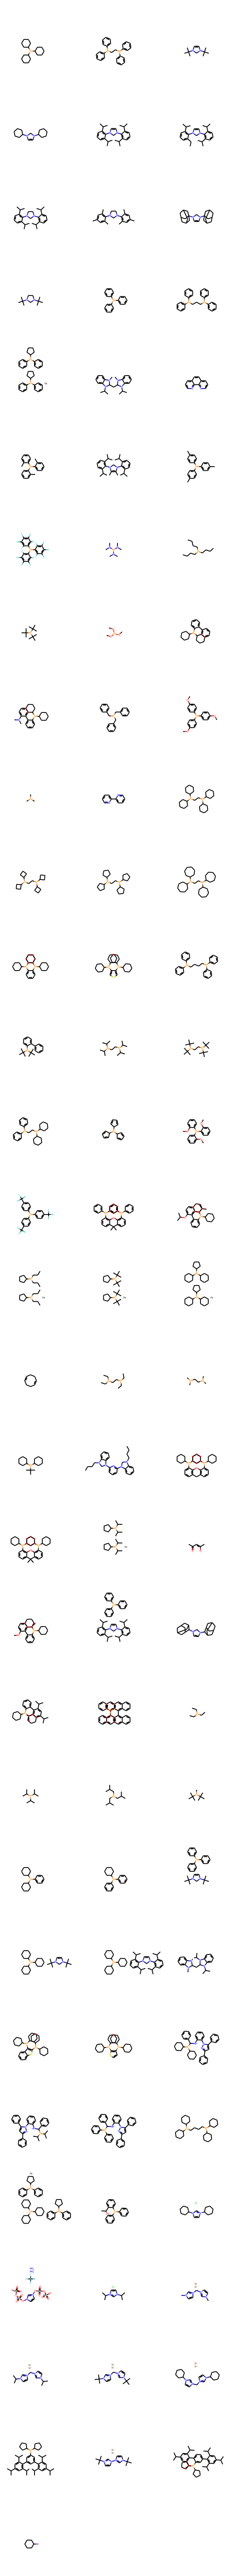

In [49]:
print(len(ligand_unik_can))

mols = [Chem.MolFromSmiles(ligand_unik_can[i]) for i in range(len(ligand_unik_can))]
Draw.MolsToGridImage(mols, maxMols = 100)

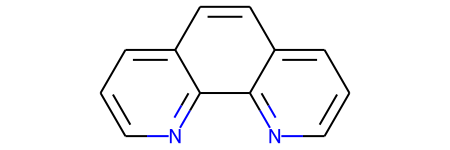

In [52]:
mol = Chem.MolFromSmiles('c1cnc3c(c1)ccc2cccnc23')
mol

In [53]:
show_DOIS(mol, df)

['https://doi.org/10.1021/acscatal.8b03436',
 'https://doi.org/10.1021/ja5029793',
 'https://doi.org/10.1021/ja410883p']

# Solvants

In [101]:
dict_solvants = {'(EtO)2CH2': 'CCOCOCC',
 '(EtO)2CH2 + Et2O': 'CCOCOCC.CCOCC',
 'CH3CN': 'CC#N',
 'CPME': 'COC1CCCC1',
 'DCE': '[Cl]CC[Cl]',
 'DMA': 'CC(=O)N(C)C',
 'DME': 'COCCOC',
 'DMF': 'C(=O)N(C)C',
 'DMSO': 'CS(=O)C',
 'Et2O': 'CCOCC',
 'EtOH': 'CCO',
 'MeOH': 'CO',
 'NMP': 'CN1CCCC1(=O)',
 'THF': 'C1OCCC1',
 'THF + DMA': 'C1OCCC1.CC(=O)N(C)C',
 'THF/DMA': 'C1OCCC1.CC(=O)N(C)C',
 'benzene': 'c1ccccc1',
 'dioxane': 'C1COCCO1',
 'dioxane - H2O': 'C1COCCO1.O',
 'hexane': 'CCCCCC',
 'iPr2O': 'CC(C)OC(C)C',
 'iPrOH': 'OC(C)C',
 'm-xylene': 'Cc1cc(C)ccc1',
 'nBu2O': 'CCCCOCCCC',
 'o-xylene': 'Cc1c(C)cccc1',
 'p-xylene': 'Cc1ccc(C)cc1',
 'sBuOH': 'CC(O)CC',
 't-amyl alcohol': 'CC(O)(C)CC',
 'tAmOMe': 'CCC(C)(C)OC',
 'tAmOMe + Et2O': 'CCC(C)(C)OC.CCOCC',
 'tBuOH': 'C(C)(C)(C)O',
 'tBuOH + H2O': 'C(C)(C)(C)O.O',
 'tBuOMe': 'C(C)(C)(C)OC',
 'toluene': 'c1ccccc1C',
 'toluene - H2O': 'c1ccccc1C.O'}

In [102]:
for smi in df["Solvent"]:
    if str(smi) != 'nan':
        smi_can = Chem.MolToSmiles(Chem.MolFromSmiles(dict_solvants[smi]))
        if smi_can not in solvent_unik_can:
            solvent_unik_can.append(smi_can)

In [103]:
len(solvent_unik_can)

34

In [8]:
m =Chem.MolFromSmiles('CC(O[Al-](OC(C)(C)C)OC(C)(C)C)(C)C')

In [5]:
df = pd.read_csv('../data_csv/Data_test10282021.csv', sep = ',')

In [6]:
from dft_descriptors import numbering_CO as nb

In [9]:
nb.show_smiles(m, df)

[]

In [10]:
mols = []
sub_df = df[df["DOI"] == "https://doi.org/10.1021/acscatal.8b03436"]

In [12]:
sub_df = sub_df[sub_df["Notes : qu'est ce qui ne rentres pas dans le tableau"] == "Scheme S1 des Sup.Infos"]

In [13]:
for smi in sub_df["Reactant Smile (C-O)"]:
    mols.append(Chem.MolFromSmiles(smi))

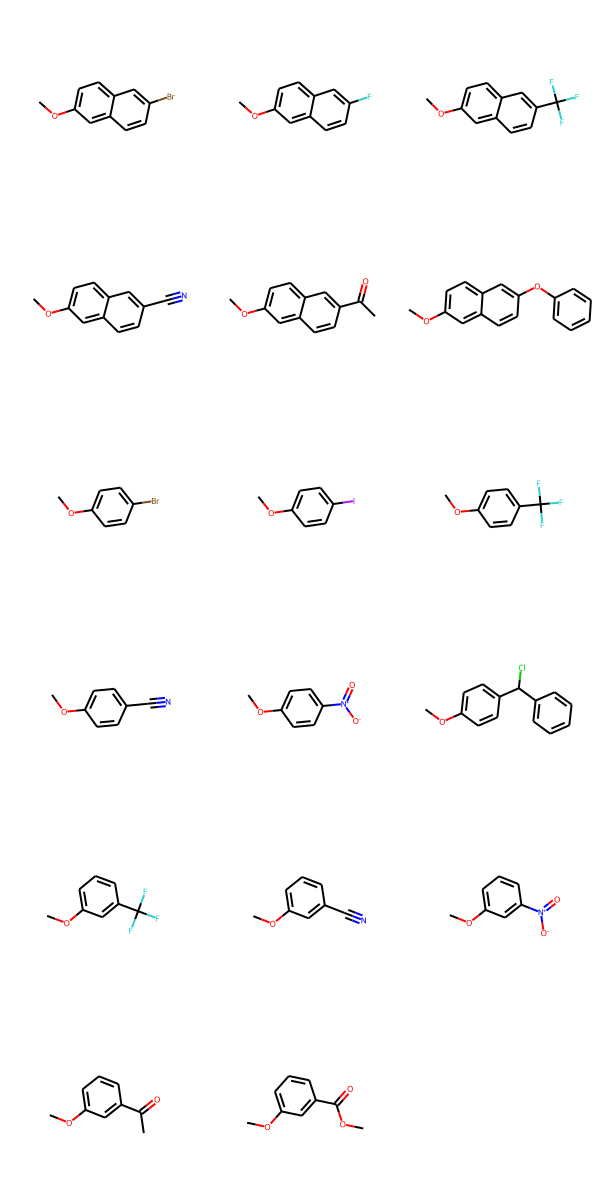

In [14]:
Draw.MolsToGridImage(mols, maxMols = 100)